# NLP

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.stem import WordNetLemmatizer


In [2]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import CONTRACTION_MAP
import unicodedata


In [3]:
%matplotlib inline

In [4]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

<b> Fetching data using web scraping

In [5]:
new_data = []

In [6]:
url='https://inshorts.com/en/read/technology'
news_category = url.split('/')[-1]

In [7]:
news_category

'technology'

In [8]:
data = requests.get(url)

In [9]:
data

<Response [200]>

In [10]:
soup = BeautifulSoup(data.content, 'html.parser')

In [11]:
soup

<!DOCTYPE doctype html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
    /* The Modal (background) */
    .modal_contact {
        display: none; /* Hidden by default */
        position: fixed; /* Stay in place */
        z-index: 8; /* Sit on top */
        left: 0;
        top: 0;
        width: 100%; /* Full width */
        height: 100%;
        overflow: auto; /* Enable scroll if needed */
        background-color: rgb(0,0,0); /* Fallback color */
        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
    }

    /* Modal Content/Box */
    .modal-content {
        background-color: #fefefe;
        margin: 15% auto;
        padding: 20px !important;
        padding-top: 0 !important;
        /* border: 1px solid #888; */
        text-align: center;
        position: relative;
        border-radius: 6px;
    }

    /* The Close Button */
    .close {
      left: 90%;
      color: #aaa;
      float: right;
      font-size: 28px;
      font-weight: bold;
    /

In [12]:
news_articles = [{'news_headline': headline.find('span', 
                                                 attrs={"itemprop": "headline"}).string,
                  'news_article': article.find('div', 
                                               attrs={"itemprop": "articleBody"}).string,
                  'news_category': news_category}

                    for headline, article in 
                     zip(soup.find_all('div', 
                                       class_=["news-card-title news-right-box"]),
                         soup.find_all('div', 
                                       class_=["news-card-content news-right-box"]))
                ]
new_data.extend(news_articles)

In [13]:
test_df =  pd.DataFrame(new_data)
test_df = test_df[['news_headline', 'news_article', 'news_category']]
    #return df

In [14]:
test_df

,news_headline,news_article,news_category
0,Airtel launches Wi-Fi calling services in India,Airtel launched its Wi-Fi calling services sta...,technology
1,Telecom operators losing ₹2.4 crore for every ...,Indian telecom companies are losing around ₹2....,technology
2,"US man sues Amazon, says hacker spoke to kids ...",A US-based man has filed a lawsuit against Ama...,technology
3,India's data rules could limit everyone's acce...,Wikipedia's operator Wikimedia Foundation urge...,technology
4,"Man learns video game making, creates one to p...","A man, Denis Wells, posted a 15-minute video o...",technology
5,"Programmer loses game he made as a kid, finds ...","A programmer, Rick Brewster, shared online his...",technology
6,"Bezos loses $9 bn in 2019, still set to end th...",Amazon Founder and CEO Jeff Bezos' net worth d...,technology
7,Astronauts bake cookies in space for the first...,Astronauts aboard the International Space Stat...,technology
8,YouTuber gets 4 years in jail for 'insulting t...,"Moroccan YouTuber Mohamed Sekkaki, known as Mo...",technology
9,"Indian techies from Google, TCS, others pen op...",Indian employees of technology companies such ...,technology


<b> Performing data fetching and dataframe generation like above

In [15]:
def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [16]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,Airtel launches Wi-Fi calling services in India,Airtel launched its Wi-Fi calling services sta...,technology
1,Telecom operators losing ₹2.4 crore for every ...,Indian telecom companies are losing around ₹2....,technology
2,"US man sues Amazon, says hacker spoke to kids ...",A US-based man has filed a lawsuit against Ama...,technology
3,India's data rules could limit everyone's acce...,Wikipedia's operator Wikimedia Foundation urge...,technology
4,"Man learns video game making, creates one to p...","A man, Denis Wells, posted a 15-minute video o...",technology
5,"Programmer loses game he made as a kid, finds ...","A programmer, Rick Brewster, shared online his...",technology
6,"Bezos loses $9 bn in 2019, still set to end th...",Amazon Founder and CEO Jeff Bezos' net worth d...,technology
7,Astronauts bake cookies in space for the first...,Astronauts aboard the International Space Stat...,technology
8,YouTuber gets 4 years in jail for 'insulting t...,"Moroccan YouTuber Mohamed Sekkaki, known as Mo...",technology
9,"Indian techies from Google, TCS, others pen op...",Indian employees of technology companies such ...,technology


In [17]:
news_df.news_category.value_counts()

technology    25
sports        25
world         24
Name: news_category, dtype: int64

<b>Removing HTML tags

In [23]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [24]:
strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

<b>Removing accented characters

In [25]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [26]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [27]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [28]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

<b>Removing Special Characters

In [29]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [30]:
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

<b>Stemming

In [31]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


In [32]:
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

<b>Lemmatization

In [48]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    #text = nlp(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [49]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crashing! his crashed yesterday, ours crash daily'

<b>Removing Stopwords

In [57]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def remove_stopwords(text, is_lower_case=False):
    stopword_list = set(stopwords.words('english'))
    
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [58]:
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

In [59]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Let’s now put this function in action! We will first combine the news headline and the news article text together to form a document for each piece of news. Then, we will pre-process them.

In [63]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [75]:
news_df['full_text'][1]

'Telecom operators losing ₹2.4 crore for every hour of Internet shutdown. Indian telecom companies are losing around ₹2.45 crore in revenue every hour they are forced to suspend Internet services, lobby group COAI said. Internet shutdowns should not be the first course of action, added COAI, which counts Airtel, Vodafone Idea and Jio as its members. On Friday, mobile Internet was reportedly suspended in at least 18 districts in Uttar Pradesh.'

In [64]:
# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

In [65]:
norm_corpus

['airtel launch wifi calling service india airtel launched wifi calling service staring delhi ncr would gradually introduced across india airtel customer avail feature simply downloading latest software smartphones without paying extra charge downloading additional application decision launch wifi calling keeping telco customercentric approach say airtel',
 'telecom operator losing crore every hour internet shutdown indian telecom company losing around crore revenue every hour forced suspend internet services lobby group coai said internet shutdown first course action added coai count airtel vodafone idea jio members friday mobile internet wa reportedly suspended least district uttar pradesh',
 'u man sue amazon say hacker spoke kid via ring security camera usbased man ha filed lawsuit amazon wifienabled security camera system ring saying defective design leaf purchaser vulnerable cyberattacks john orange said stranger compromised ring outdoor camera spoke three kids beckoning come clo

In [82]:
news_df.head()

,news_headline,news_article,news_category,full_text,clean_text
0,Airtel launches Wi-Fi calling services in India,Airtel launched its Wi-Fi calling services sta...,technology,Airtel launches Wi-Fi calling services in Indi...,airtel launch wifi calling service india airte...
1,Telecom operators losing ₹2.4 crore for every ...,Indian telecom companies are losing around ₹2....,technology,Telecom operators losing ₹2.4 crore for every ...,telecom operator losing crore every hour inter...
2,"US man sues Amazon, says hacker spoke to kids ...",A US-based man has filed a lawsuit against Ama...,technology,"US man sues Amazon, says hacker spoke to kids ...",u man sue amazon say hacker spoke kid via ring...
3,India's data rules could limit everyone's acce...,Wikipedia's operator Wikimedia Foundation urge...,technology,India's data rules could limit everyone's acce...,india data rule could limit everyones access i...
4,"Man learns video game making, creates one to p...","A man, Denis Wells, posted a 15-minute video o...",technology,"Man learns video game making, creates one to p...",man learns video game making creates one propo...


In [69]:
# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Telecom operators losing ₹2.4 crore for every hour of Internet shutdown. Indian telecom companies are losing around ₹2.45 crore in revenue every hour they are forced to suspend Internet services, lobby group COAI said. Internet shutdowns should not be the first course of action, added COAI, which counts Airtel, Vodafone Idea and Jio as its members. On Friday, mobile Internet was reportedly suspended in at least 18 districts in Uttar Pradesh.',
 'clean_text': 'telecom operator losing crore every hour internet shutdown indian telecom company losing around crore revenue every hour forced suspend internet services lobby group coai said internet shutdown first course action added coai count airtel vodafone idea jio members friday mobile internet wa reportedly suspended least district uttar pradesh'}

<b>Typical parsing techniques for understanding text syntax are mentioned below.

<ol>
    <b><li>Parts of Speech (POS) Tagging</li>
    <li>Shallow Parsing or Chunking</li>
    <li>Constituency Parsing</li>
    <li>Dependency Parsing</li></b>
</ol>

<b>Thus, a sentence typically follows a hierarchical structure consisting the following components,
sentence → clauses → phrases → words</b>

In [83]:
# POS tagging with nltk
sentence = str(news_df.iloc[1].news_headline)

nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Telecom,NN
1,operators,NNS
2,losing,VBG
3,₹2.4,NN
4,crore,NN
5,for,IN
6,every,DT
7,hour,NN
8,of,IN
9,Internet,NNP


<h3>Shallow Parsing or Chunking

Based on the hierarchy we depicted earlier, groups of words make up phrases. There are five major categories of phrases:
<ol>
    <li><b>Noun phrase (NP):</b> These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.</li>
    <li><b>Verb phrase (VP):</b> These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.</li>
    <li><b>Verb phrase (VP):</b> These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.</li>
    <li><b>Adverb phrase (ADVP):</b> These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.</li>
    <li><b>Prepositional phrase (PP):</b> These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.</li>


<p><b>Shallow parsing</b>, also known as light parsing or chunking , is a popular natural language processing technique of analyzing the structure of a sentence to break it down into its smallest constituents (which are tokens such as words) and group them together into higher-level phrases. This includes POS tags as well as phrases from a sentence.</p>

In [87]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


We will leverage two chunking utility functions, tree2conlltags , to get triples of word, tag, and chunk tags for each token, and conlltags2tree to generate a parse tree from these token triples. We will be using these functions to train our parser.

In [88]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
print(wtc)

[('Chancellor', 'NNP', 'O'), ('of', 'IN', 'B-PP'), ('the', 'DT', 'B-NP'), ('Exchequer', 'NNP', 'I-NP'), ('Nigel', 'NNP', 'B-NP'), ('Lawson', 'NNP', 'I-NP'), ("'s", 'POS', 'B-NP'), ('restated', 'VBN', 'I-NP'), ('commitment', 'NN', 'I-NP'), ('to', 'TO', 'B-PP'), ('a', 'DT', 'B-NP'), ('firm', 'NN', 'I-NP'), ('monetary', 'JJ', 'I-NP'), ('policy', 'NN', 'I-NP'), ('has', 'VBZ', 'B-VP'), ('helped', 'VBN', 'I-VP'), ('to', 'TO', 'I-VP'), ('prevent', 'VB', 'I-VP'), ('a', 'DT', 'B-NP'), ('freefall', 'NN', 'I-NP'), ('in', 'IN', 'B-PP'), ('sterling', 'NN', 'B-NP'), ('over', 'IN', 'B-PP'), ('the', 'DT', 'B-NP'), ('past', 'JJ', 'I-NP'), ('week', 'NN', 'I-NP'), ('.', '.', 'O')]


<h3>Emotion and Sentiment Analysis</h3>

Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews.
Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Various popular lexicons are used for sentiment analysis, including the following.
<ul>
    <li>AFINN lexicon</li>
    <li>Bing Liu’s lexicon</li>
    <li>MPQA subjectivity lexicon</li>
    <li>SentiWordNet</li>
    <li>TextBlob</li>
    <li>VADER lexicon</li>

In [91]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in norm_corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                             
                        count   mean       std   min   25%  50%  75%   max
news_category                                                             
sports                   25.0  2.920  8.650241  -9.0  -1.0  2.0  4.0  27.0
technology               25.0  0.280  5.450688 -11.0  -3.0  1.0  3.0   9.0
world                    24.0 -3.375  8.026112 -14.0 -10.0 -5.5  2.0  21.0

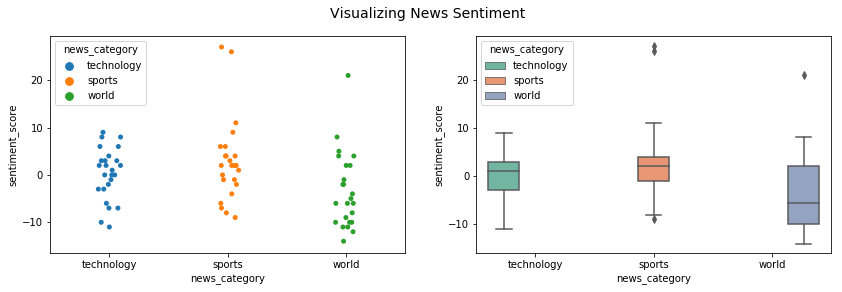

In [93]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


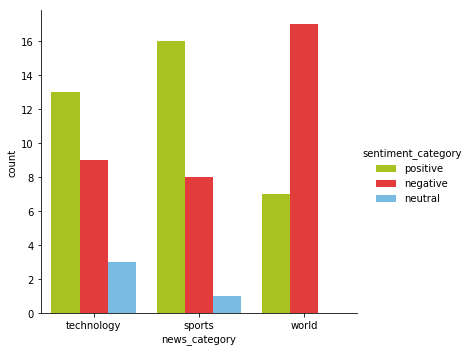

In [94]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [98]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 9)].index[0]
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -11)].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Indian telecom companies are losing around ₹2.45 crore in revenue every hour they are forced to suspend Internet services, lobby group COAI said. Internet shutdowns should not be the first course of action, added COAI, which counts Airtel, Vodafone Idea and Jio as its members. On Friday, mobile Internet was reportedly suspended in at least 18 districts in Uttar Pradesh.

Most Positive Tech News Article: Shares of iPhone maker Apple rose nearly 2% to hit a record high of $289.9 apiece on Thursday, driven by strong early estimates on sales during the Christmas holiday shopping season. So far in 2019, its shares have risen over 83%, putting it on the track for its best annual performance in a decade, since rising about 150% in 2009.


In [99]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 21)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -14)].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Former Pakistan President Pervez Musharraf on Friday moved the Lahore High Court challenging the death sentence given to him by a special court. Musharraf, who has been in Dubai since 2016, was convicted of high treason for imposing emergency in 2007. The 86 page-long petition states that the "judgement contained a mix of anomalies and contradictory statements".

Most Positive Tech News Article: Ahead of Israel's general election in March, Prime Minister Benjamin Netanyahu won a vote to keep the Likud party leadership, the party said on Friday. Netanyahu secured 72.5% as opposed to his rival Gideon Saar, a former education and interior minister, who polled 27.5%. "A huge win! Thank you to Likud members for their trust, support and love," Netanyahu tweeted.


In [101]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                            \
                        count      mean       std   min     25%     50%   
news_category                                                             
sports                   25.0  0.135600  0.236763 -0.30  0.0200  0.1180   
technology               25.0  0.042040  0.193963 -0.35 -0.0620  0.0600   
world                    24.0  0.035583  0.170798 -0.30 -0.0765  0.0165   

                              
                  75%    max  
news_category                 
sports         0.2110  0.737  
technology     0.1670  0.350  
world          0.1385  0.371

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


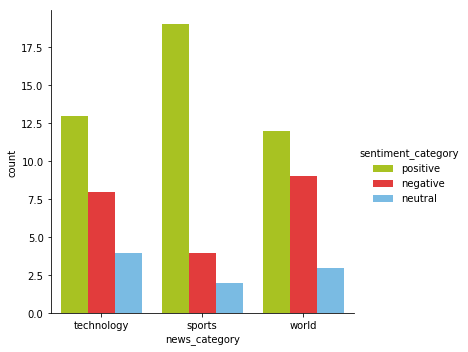

In [102]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [103]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 0.371)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -0.30)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Moroccan YouTuber Mohamed Sekkaki, known as Moul Kaskita, was sentenced to four years in jail for criticising King Mohammed VI, who is considered "inviolable" under the nation's constitution. Sekkaki also allegedly referred to Moroccans as 'donkeys' in a video broadcast. Recently, Moroccan rapper Mohamed Mounir, 'Gnawi', was sentenced to a year in jail for allegedly 'insulting a public official'.

Most Positive World News Article: Ahead of Israel's general election in March, Prime Minister Benjamin Netanyahu won a vote to keep the Likud party leadership, the party said on Friday. Netanyahu secured 72.5% as opposed to his rival Gideon Saar, a former education and interior minister, who polled 27.5%. "A huge win! Thank you to Likud members for their trust, support and love," Netanyahu tweeted.
